In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.pyplot import figure
import time
import json

In [6]:
#use get get location to make path university
path = os.getcwd() + '\\TSS_LRD\s9\LRDP1Z1'
path

'c:\\Users\\Tony Ho\\Documents\\Beacon-plot\\TSS_LRD\\s9\\LRDP1Z1'

In [5]:
# list for file name
base_path = r'C:\Users\Tony Ho\Downloads\Office test log\4m\ios'
os.listdir(base_path)

['4m_-12_ios.csv', '4m_-4_ios.csv', '4m_-8_ios.csv', '4m_0_ios.csv']

In [32]:
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\TSS_LRD\s9\LRDP1Z1\lrd_p1_1a_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\lrd_p1_a1_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\p1z1_ptA_s9.csv',skiprows=4)
#df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\p1_c_am_s9.csv',skiprows=4)
df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\ios\{}_0_ios.csv'.format(distance,distance),skiprows=4)
df = df[['UID','RECEIVED TIME','RSSI']]
df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
#count the duration of data-taking
diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti = dti.to_frame(name='time')
dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

In [33]:
beacon1 = [146,147]
beacon2 = [148,149]
beacon3 = [150,151]
df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge1['RSSI'].fillna(-100, inplace=True)
df_merge2 = dti.merge(df[df.UID.isin(beacon2)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge2['RSSI'].fillna(-100, inplace=True)
df_merge3 = dti.merge(df[df.UID.isin(beacon3)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge3['RSSI'].fillna(-100, inplace=True)

In [13]:
x = df_merge1.UID.unique()
x = x[~np.isnan(x)]
x

array([147., 146.])

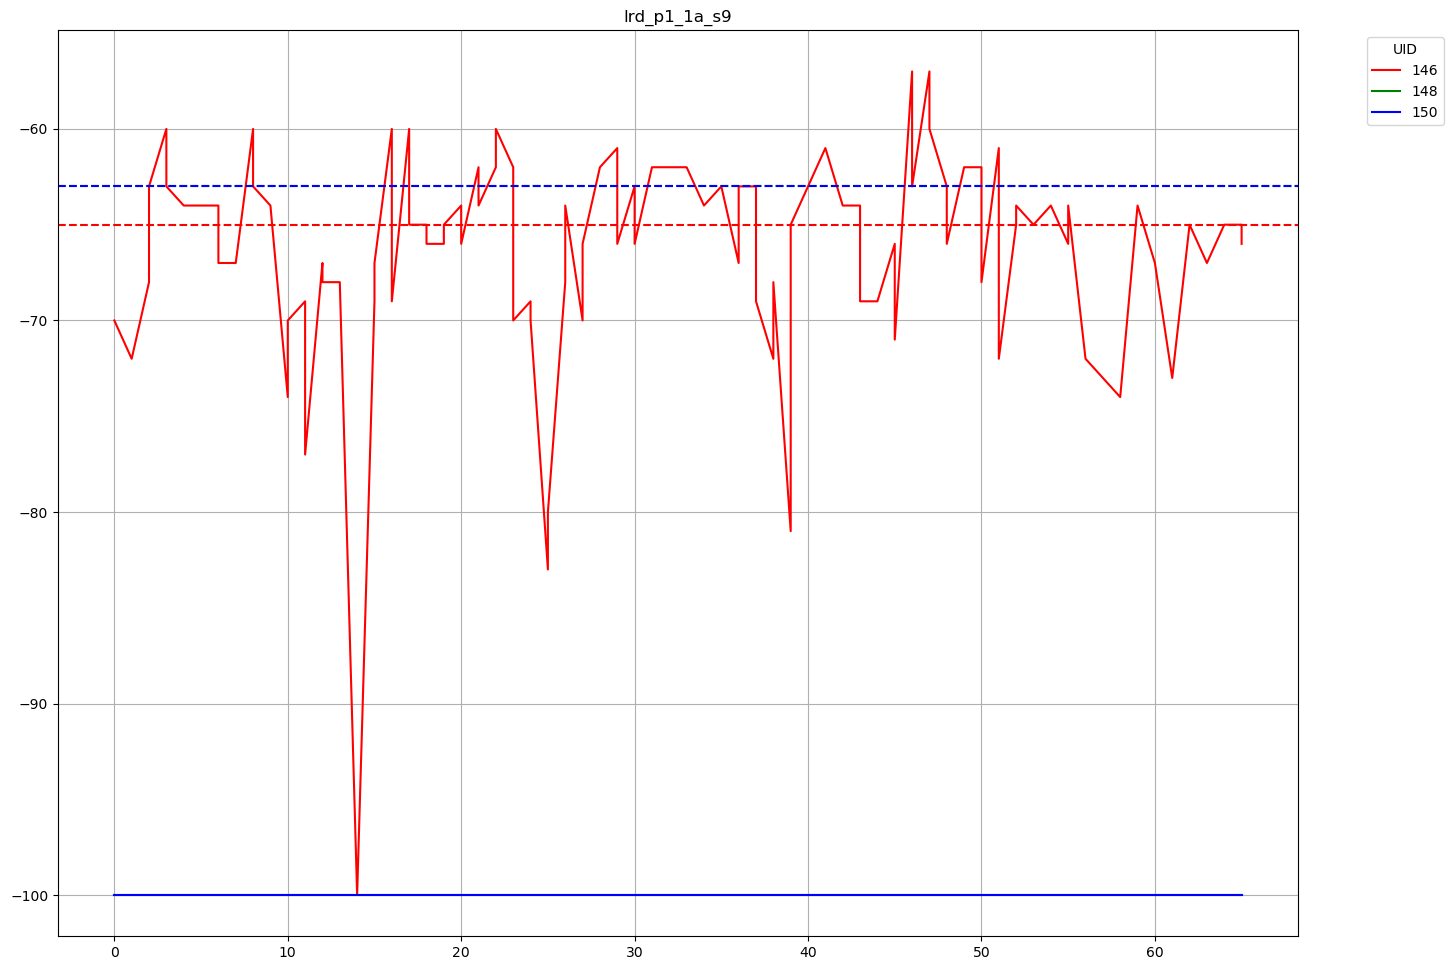

In [34]:
#set figure as larger size
figure(figsize=(16, 12), dpi=100)
plt.plot(df_merge1['time_delta'],df_merge1['RSSI'],'r',label='146')
plt.axhline(y = -65, color = 'r', linestyle = '--')
plt.plot(df_merge2['time_delta'],df_merge2['RSSI'],'g',label='148')
plt.axhline(y = -63, color = 'g', linestyle = '--')
plt.plot(df_merge3['time_delta'],df_merge3['RSSI'],'b',label='150')
plt.axhline(y = -63, color = 'b', linestyle = '--')
plt.grid(True)
plt.title('lrd_p1_1a_s9')
#set the legend out of the plot
plt.legend(title='UID', bbox_to_anchor=(1.05, 1), loc='upper left') 
#plt.savefig('s9_p1z1.png')

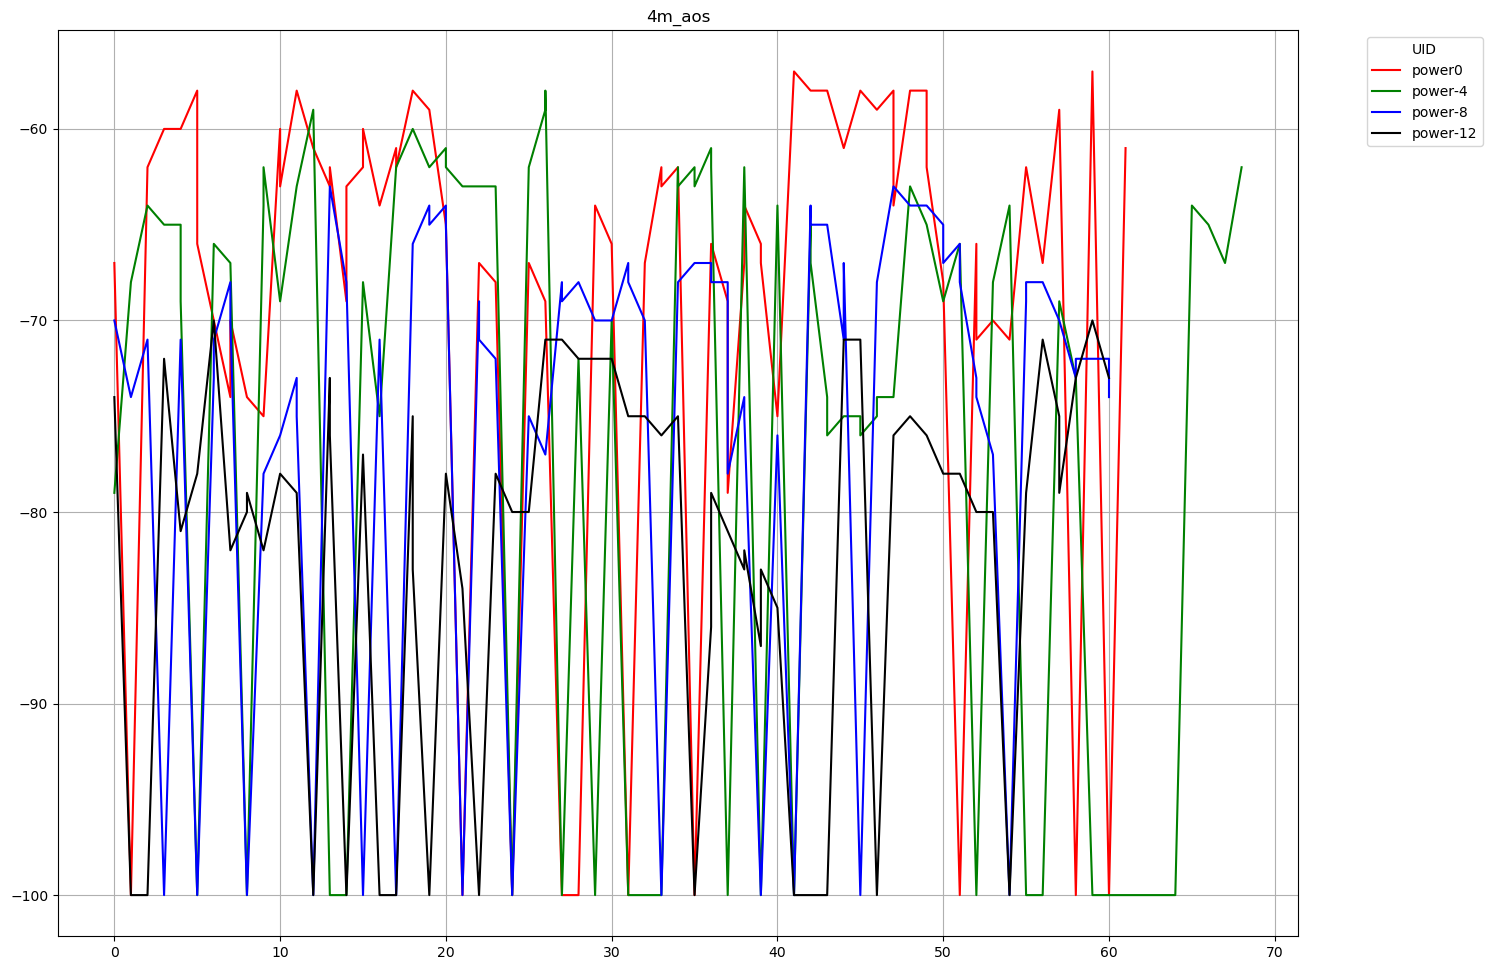

In [4]:
distance = '4m'
os_platform = 'aos'
df = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_0_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df = df[~df.UUID.str.contains("Rule")]
df = df[~df.UUID.str.contains("=")]
df = df[['UID','RECEIVED TIME','RSSI']]
df['RECEIVED TIME'] = pd.to_datetime(df['RECEIVED TIME'])
#count the duration of data-taking
diff = (df['RECEIVED TIME'].iloc[-1]-df['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti = pd.date_range(df['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti = dti.to_frame(name='time')
dti['time_delta'] = ((dti['time']-dti['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df2 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-4_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df2 = df2[~df2.UUID.str.contains("Rule")]
df2 = df2[~df2.UUID.str.contains("=")]
df2 = df2[['UID','RECEIVED TIME','RSSI']]
df2['RECEIVED TIME'] = pd.to_datetime(df2['RECEIVED TIME'])
#count the duration of data-taking
diff = (df2['RECEIVED TIME'].iloc[-1]-df2['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti2 = pd.date_range(df2['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti2 = dti2.to_frame(name='time')
dti2['time_delta'] = ((dti2['time']-dti2['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df3 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-8_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df3 = df3[~df3.UUID.str.contains("Rule")]
df3 = df3[~df3.UUID.str.contains("=")]
df3 = df3[['UID','RECEIVED TIME','RSSI']]
df3['RECEIVED TIME'] = pd.to_datetime(df3['RECEIVED TIME'])
#count the duration of data-taking
diff = (df3['RECEIVED TIME'].iloc[-1]-df3['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti3 = pd.date_range(df3['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti3 = dti3.to_frame(name='time')
dti3['time_delta'] = ((dti3['time']-dti3['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)

df4 = pd.read_csv(r'C:\Users\Tony Ho\Downloads\Office test log\{}\{}\{}_-12_{}.csv'.format(distance,os_platform,distance,os_platform),skiprows=4)
df4 = df4[~df4.UUID.str.contains("Rule")]
df4 = df4[~df4.UUID.str.contains("=")]
df4 = df4[['UID','RECEIVED TIME','RSSI']]
df4['RECEIVED TIME'] = pd.to_datetime(df4['RECEIVED TIME'])
#count the duration of data-taking
diff = (df4['RECEIVED TIME'].iloc[-1]-df4['RECEIVED TIME'].iloc[0]).total_seconds()
#create the time series as no missing RSSI
dti4 = pd.date_range(df4['RECEIVED TIME'].iloc[0], periods=diff,freq='S')
dti4 = dti4.to_frame(name='time')
dti4['time_delta'] = ((dti4['time']-dti4['time'].iloc[0])/np.timedelta64(1, 's')).astype(int)


beacon1 = [146,147]
df_merge1 = dti.merge(df[df.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge1['RSSI'].fillna(-100, inplace=True)

df_merge2 = dti2.merge(df2[df2.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge2['RSSI'].fillna(-100, inplace=True)

df_merge3 = dti3.merge(df3[df3.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge3['RSSI'].fillna(-100, inplace=True)

df_merge4 = dti4.merge(df4[df4.UID.isin(beacon1)], how='outer', left_on='time',right_on='RECEIVED TIME')
df_merge4['RSSI'].fillna(-100, inplace=True)

#set figure as larger size
figure(figsize=(16, 12), dpi=100)
plt.plot(df_merge1['time_delta'],df_merge1['RSSI'],'r',label='power0')
#plt.axhline(y = -65, color = 'r', linestyle = '--')
plt.plot(df_merge2['time_delta'],df_merge2['RSSI'],'g',label='power-4')
#plt.axhline(y = -65, color = 'r', linestyle = '--')
plt.plot(df_merge3['time_delta'],df_merge3['RSSI'],'b',label='power-8')

plt.plot(df_merge4['time_delta'],df_merge4['RSSI'],'k',label='power-12')
plt.grid(True)
plt.title('{}_{}'.format(distance,os_platform))
#set the legend out of the plot
plt.legend(title='UID', bbox_to_anchor=(1.05, 1), loc='upper left') 
#plt.savefig('s9_p1z1.png')